# Результат:

#### Перед способом обработки стоит '+', если результат лучше чем baseline, '-' - если хуже.

Попробавал следующие подходы:
- Baseline - все пустые значения были заменены на среднее по признаку
- '+' Удалил все объекты, где есть нулевые значения - результат немного улучшился
- '+' Пропуски заменил средним значением по признаку.
- '+' Заменил пропуски не средним, а медианой и модой
Во всех последующих попытках, удалялись признаки с более половиной отсутствующих значений и пропуски заменялись медианой по признаку. 
- '-' Удалил коррелирующие данные
- '+' Выровнил баланс значений таргета
- '-' Регуляризация. Отобор по 6, 12, 20 самых "влиятельных" признаков; как положительного, так и отрицательного влияния
- '-' Работа с выбросами
- '+' Удаление категориальных признаков (у которых менее 100 уникальных значений) и коррелирующих признаков
- '+' dummies категориальных признаков
- '+' Удалил коррелирующие, категориальные признаки и выравнил баланас значений целевой переменной
- '+' Добавил к предыдущему шагу Регуляризацию: отобрал 15 'влиятельных' признаков по модулю.

Лучший результат показал последний подход при котором:
    - Были удалены признаки с пропусками в более чем половине объектов
    - Удалены коррелирующие признаки
    - Удалены категориальные признаки
    - Пустые значения заменены на медиану по признаку
    - Выровнен баланс значений целевой переменной
    - И отобрано 15 самых "влиятельных" признаков.
    


In [443]:
# Итоговая таблица результатов по всем подходам:
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908


In [334]:
######

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline


from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [336]:
data_train = pd.read_csv('aps_failure_training_set.csv', sep = ',')
data_train.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [337]:
data_test = pd.read_csv('aps_failure_test_set.csv', sep = ',')
data_test.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

In [338]:
print(data_train.shape, data_test.shape)


(60000, 171) (16000, 171)


In [339]:
# В данных есть значения "na", заменим их на None:
data_train.replace({'na': None}, inplace = True)
data_test.replace({'na': None}, inplace = True)


In [340]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [341]:
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [342]:
# Так как все признаки имеют числовые значения, переведем их в таковые:
columns_no_target = list(data_train.columns)
columns_no_target.remove('class')


In [343]:
%%time
data_train[columns_no_target] = data_train[columns_no_target].apply(pd.to_numeric)
data_test[columns_no_target] = data_test[columns_no_target].apply(pd.to_numeric)


CPU times: user 39.6 s, sys: 1.33 s, total: 41 s
Wall time: 41.4 s


In [344]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [345]:
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


In [346]:
# Отберем категориальные признаки. Будем считать категориальными те признаки, которые имеют менее 100 уникальных значений:
obj_feature = []
for i in columns_no_target:
    if data_train[i].nunique() < 100:
        obj_feature.append(i)

obj_feature


['ab_000',
 'ar_000',
 'as_000',
 'au_000',
 'cd_000',
 'ch_000',
 'cr_000',
 'cs_009',
 'dj_000',
 'dz_000',
 'ef_000',
 'eg_000']

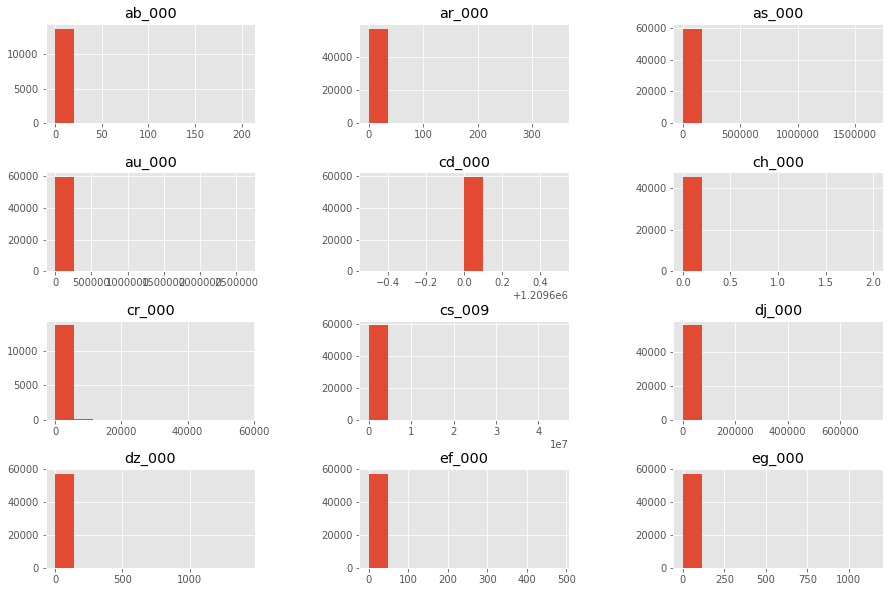

In [347]:
data_train[obj_feature].hist(figsize = (15, 10), bins = 10);
plt.subplots_adjust(wspace = 0.5, hspace = 0.5);


In [348]:
# В данных признаках явно много выбросов

In [349]:
small_number_features = []
for i in columns_no_target:
    if (data_train[i].nunique() >= 100) & (data_train[i].nunique() <= 3000):
        small_number_features.append(i)

len(small_number_features)


40

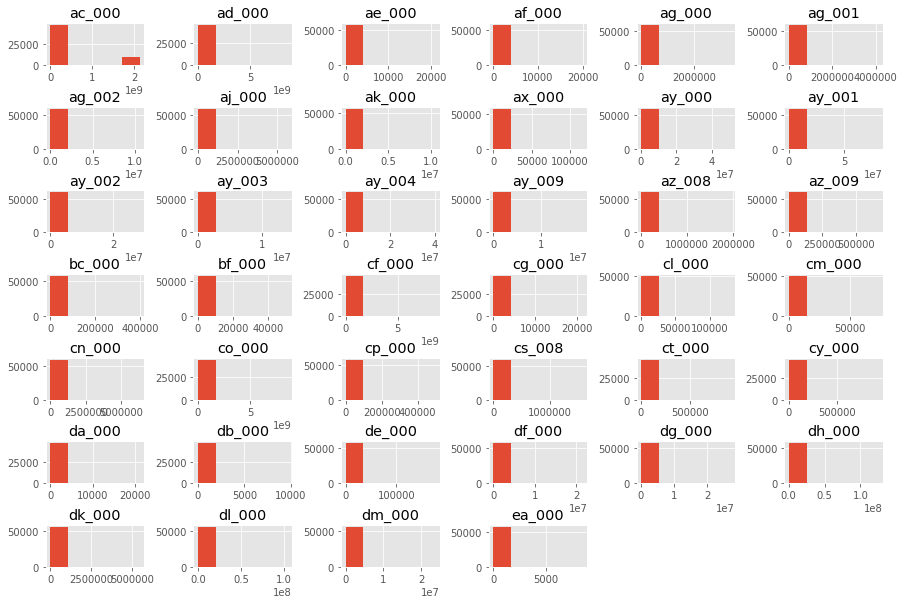

In [350]:
data_train[small_number_features].hist(figsize = (15, 10), bins = 5);
plt.subplots_adjust(wspace = 0.5, hspace = 1);


In [351]:
# Опять много признаков с большими выбросами

In [352]:
large_number_features = []
for i in columns_no_target:
    if data_train[i].nunique() > 3000:
        large_number_features.append(i)

len(large_number_features)


118

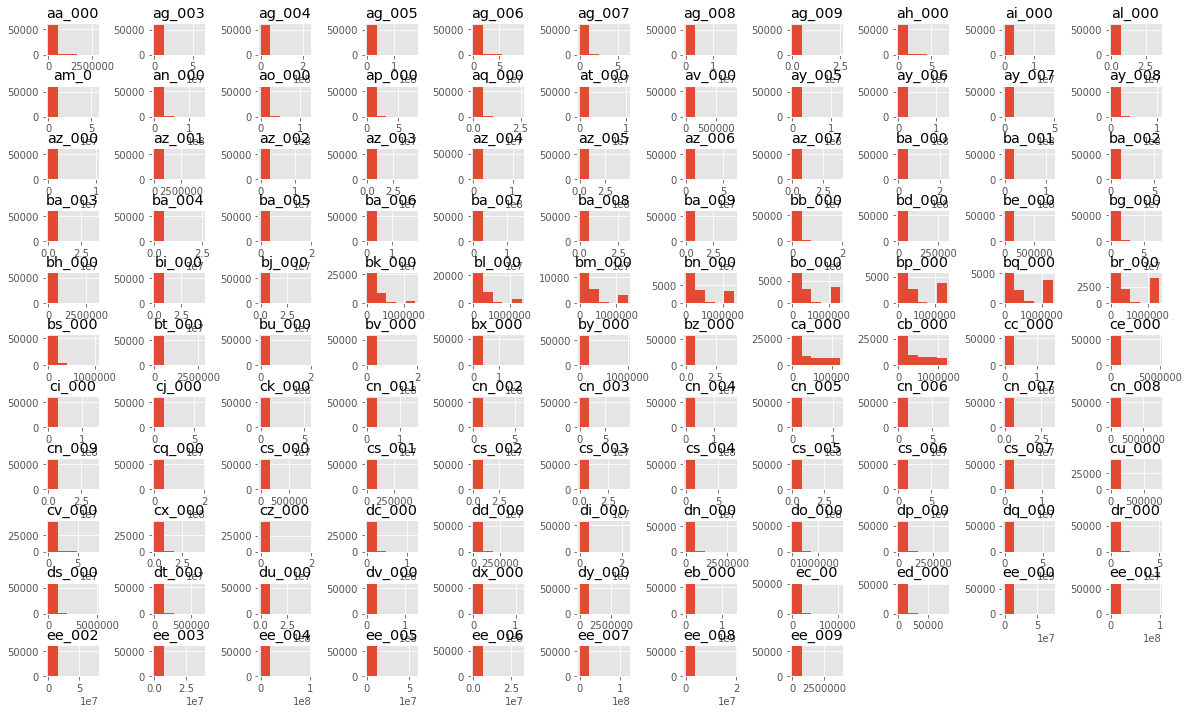

In [353]:
data_train[large_number_features].hist(figsize = (20, 12), bins = 5);
plt.subplots_adjust(wspace = 1, hspace = 1);


In [354]:
# Все так же много признаков с выбросами и мало с хоть каким-либо распределением

In [355]:
len(obj_feature)


12

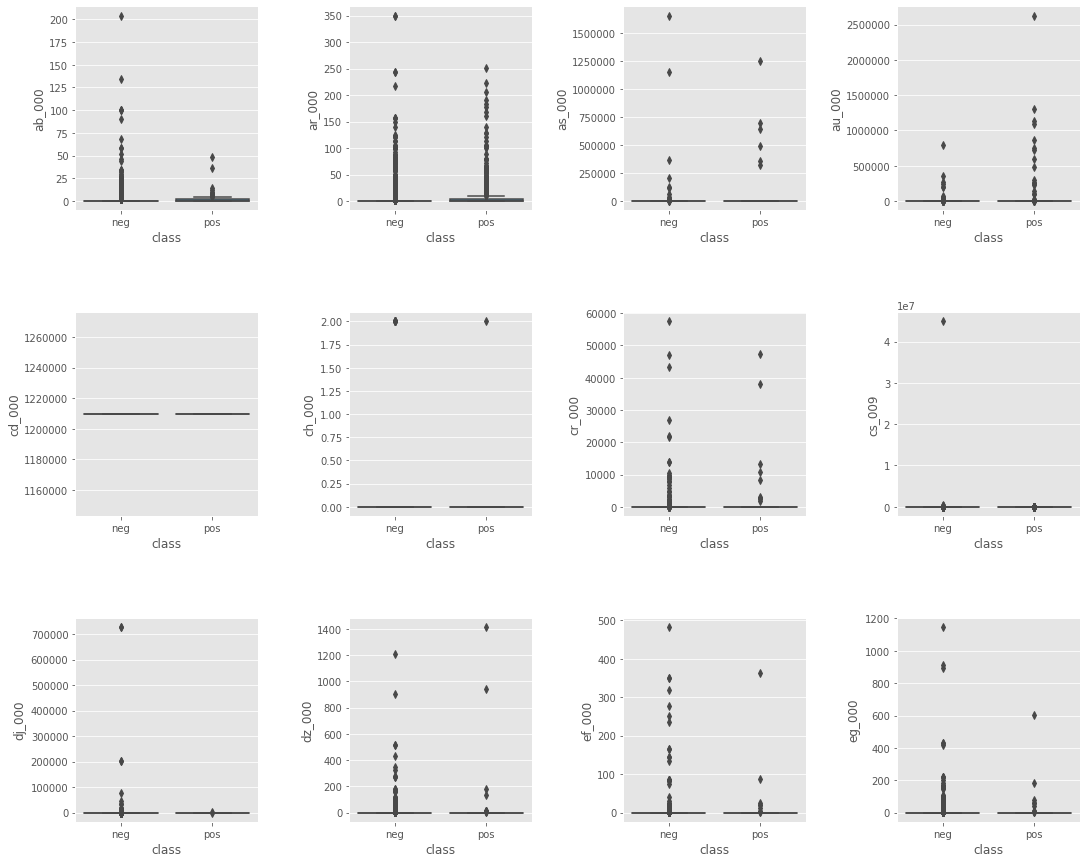

In [356]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (18, 15))

for idx, feat in enumerate(obj_feature):
    sns.boxplot(x = 'class', y = feat, data = data_train, ax = axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel('class')
    axes[idx // 4, idx % 4].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

In [357]:
# По данным Можно сказать у какого Класса больше выбросов)


In [358]:
len(small_number_features)


40

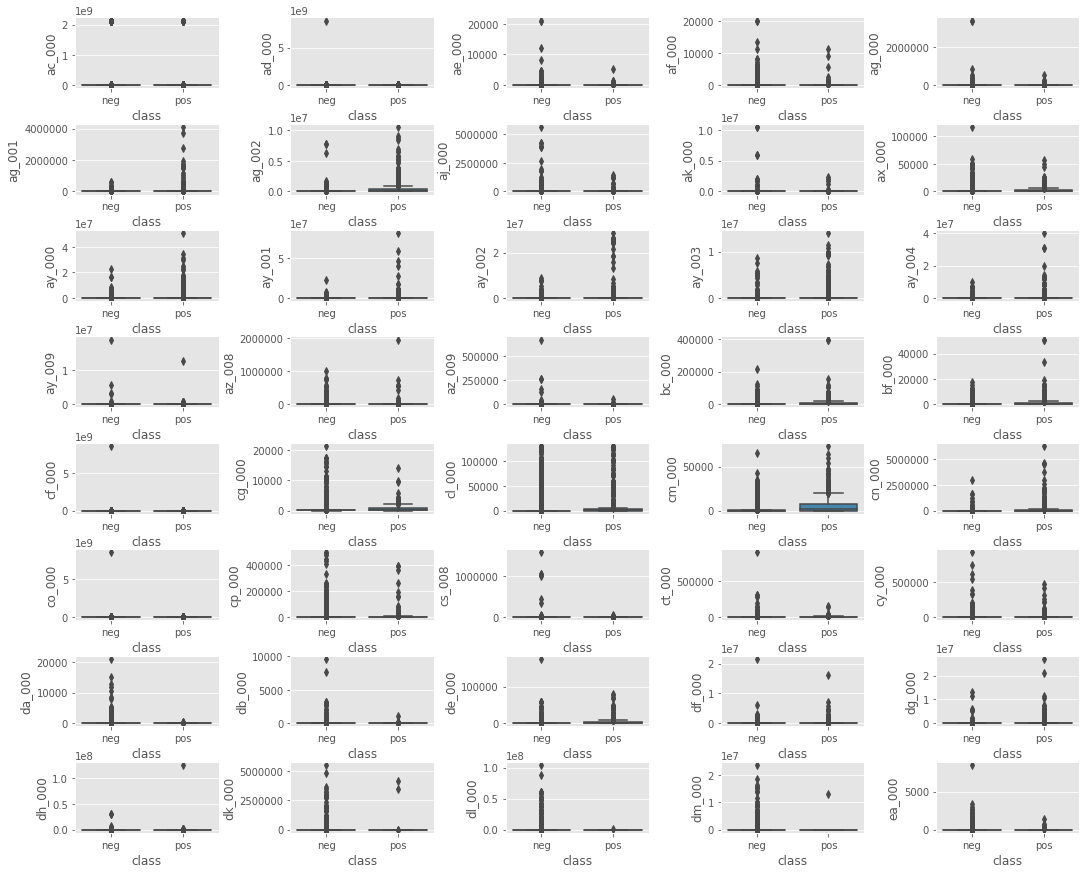

In [359]:
fig, axes = plt.subplots(nrows = 8, ncols = 5, figsize = (18, 15))

for idx, feat in enumerate(small_number_features):
    sns.boxplot(x = 'class', y = feat, data = data_train, ax = axes[idx // 5, idx % 5])
    axes[idx // 5, idx % 5].set_xlabel('class')
    axes[idx // 5, idx % 5].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

### Посмотрим на целевую переменную:

In [360]:
data_train['class'].value_counts()


neg    59000
pos     1000
Name: class, dtype: int64

In [361]:
data_test['class'].value_counts()


neg    15625
pos      375
Name: class, dtype: int64

In [362]:
data_train['class'].value_counts(normalize = True)


neg    0.983333
pos    0.016667
Name: class, dtype: float64

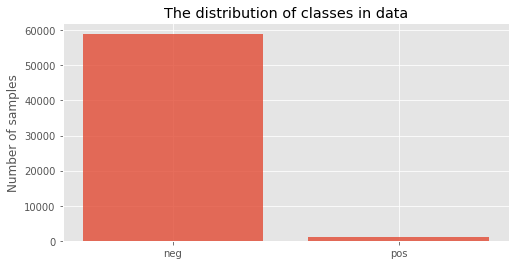

In [363]:
def class_distribution_plot(data):
    number_of_class_obs_dict = data.groupby("class")["class"].count().to_dict()
    objects = ('neg', 'pos')
    y_pos = np.arange(2)
    performance = [number_of_class_obs_dict['neg'], number_of_class_obs_dict['pos']]

    plt.figure(figsize=(8,4))
    plt.bar(y_pos, performance, align='center', alpha=0.8)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number of samples')
    plt.title('The distribution of classes in data')
    plt.show()
    
class_distribution_plot(data_train)


In [364]:
# Переведем целевую переменную в числовую форму:
data_train['class'] = data_train['class'].map({'pos': 1, 'neg': 0})
data_train['class'].value_counts()


0    59000
1     1000
Name: class, dtype: int64

In [365]:
data_test['class'] = data_test['class'].map({'pos': 1, 'neg': 0})
data_test['class'].value_counts()


0    15625
1      375
Name: class, dtype: int64

## Baseline:

In [366]:
# За baseline примим результат на данных, где все пустые значения заменены средним по призаку.


In [367]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled


In [368]:
def quality_report(prediction, actual):
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    return quality_list


In [369]:
def assess_data(data_train, data_test, C = 1):
    X_train = data_train.drop('class', axis = 1)
    y_train = data_train['class']
    X_test = data_test.drop('class', axis = 1)
    y_test = data_test['class']
    
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    
    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values)
    
    return quality_list


In [370]:
def fill_NA(data, strategy = 'mean'):
    data_copy = data.copy(deep = True)
    for c in data_copy:
        if data_copy[c].isnull().sum() > 0:
            if strategy =='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy == 'median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy == 'mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy


In [371]:
df_train_baseline = fill_NA(data_train, strategy = 'mean')
df_test_baseline = fill_NA(data_test, strategy = 'mean')


In [372]:
df_list = assess_data(df_train_baseline, df_test_baseline)

df_quality = pd.DataFrame([df_list], 
                          columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
                          index=["baseline"]
                         )
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.99,0.696,0.829,0.757,0.911


## Попробуем улучшить результат

### 1. Удалим признаки с отсутствием больше половины значений и удалим объекты с пустыми значениями:

In [373]:
big_nulls_columns = []
for i in data_train:
    if ((data_train[i].isnull().sum()) / data_train.shape[0] * 100.) > 50:
        big_nulls_columns.append(i)
        print (i, '\t', (data_train[i].isnull().sum()) / data_train.shape[0] * 100.)


ab_000 	 77.215
bm_000 	 65.915
bn_000 	 73.34833333333334
bo_000 	 77.22166666666666
bp_000 	 79.56666666666666
bq_000 	 81.20333333333333
br_000 	 82.10666666666665
cr_000 	 77.215


In [374]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)
print(df_train.shape, df_test.shape)

df_train.dropna(inplace = True)
df_test.dropna(inplace = True)
print(df_train.shape, df_test.shape)


(60000, 163) (16000, 163)
(20915, 163) (5620, 163)


In [375]:
df_list = assess_data(df_train, df_test)
df_quality.loc['delet_all_nan'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920


In [376]:
# Удаление всех пустых значений улучшило наши оценки


### 2. Удалим признаки с отсутствием больше половины значений и заменой оставшихся пропусков на среднее, медиану и моду:

In [377]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)
print(data_train.shape, data_test.shape)
print(df_train.shape, df_test.shape)


(60000, 171) (16000, 171)
(60000, 163) (16000, 163)


In [378]:
df_train_mean = fill_NA(df_train, strategy = 'mean')
df_test_mean = fill_NA(df_test, strategy = 'mean')


In [379]:
df_list = assess_data(df_train_mean, df_test_mean)
df_quality.loc['del_null_columns_and_mean_nan'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916


In [380]:
# посмотрим с медианой:
df_train_median = fill_NA(df_train, strategy = 'median')
df_test_median = fill_NA(df_test, strategy = 'median')


In [381]:
df_list = assess_data(df_train_median, df_test_median)
df_quality.loc['del_null_columns_and_median_nan'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917


In [382]:
# и модой:
df_train_mode = fill_NA(df_train, strategy = 'mode')
df_test_mode = fill_NA(df_test, strategy = 'mode')


In [383]:
df_list = assess_data(df_train_mode, df_test_mode)
df_quality.loc['del_null_columns_and_mode_nan'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914


In [384]:
# Удаление столбцов с большим количествои пропущенных значений дало улучшение по некоторым метрикам. 
# А из трех способов замены чуть лучше себя показала mediana


### 3. Удалим коррелирующие признаки

In [385]:
# Удалим коррелирующие признаки:
Corr = data_train.corr()

CorField = []
CorPairs = []

for i in Corr:
    for j in Corr.index[Corr[i] > 0.80]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(i)
            CorPairs.append([i, j, Corr[i][Corr.index == j].values[0]])

print(len(CorField))


66


In [386]:
f = CorField + big_nulls_columns
f = list(set(f))
len(f)


69

In [387]:
df_train_no_corr = data_train.drop(f, axis = 1)
df_test_no_corr = data_test.drop(f, axis = 1)

print(data_train.shape, data_test.shape)
print(df_train_no_corr.shape, df_test_no_corr.shape)


(60000, 171) (16000, 171)
(60000, 102) (16000, 102)


In [388]:
df_train_no_corr = fill_NA(df_train_no_corr, strategy = 'median')
df_test_no_corr = fill_NA(df_test_no_corr, strategy = 'median')


In [389]:
df_list = assess_data(df_train_no_corr, df_test_no_corr)
df_quality.loc['del_corr'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907


In [390]:
# Удаление коррелирующих признаков не дало улучшения показателей, причем сильно просел Precision.


### 4. Попробуем выровнять баланс классов целевой переменной

In [391]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)

df_train_median = fill_NA(df_train, strategy = 'median')
df_test_median = fill_NA(df_test, strategy = 'median')

print(data_train.shape, data_test.shape)
print(df_train_median.shape, df_test_median.shape)


(60000, 171) (16000, 171)
(60000, 163) (16000, 163)


In [392]:
l_n_train = int(len(df_train_median[df_train_median['class'] == 0]))
train_sam = pd.concat([ df_train_median[df_train_median['class'] == 0], 
                       df_train_median[df_train_median['class'] == 1].sample(l_n_train, replace = True) ])
train_sam['class'].value_counts()


1    59000
0    59000
Name: class, dtype: int64

In [393]:
l_n_test = int(len(df_test_median[df_test_median['class'] == 0]))
test_sam = pd.concat([ df_test_median[df_test_median['class'] == 0], 
                       df_test_median[df_test_median['class'] == 1].sample(l_n_test, replace = True) ])
test_sam['class'].value_counts()


1    15625
0    15625
Name: class, dtype: int64

In [394]:
df_list = assess_data(train_sam, test_sam)
df_quality.loc['sample'] = df_list
df_quality.round(3)


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953


In [395]:
# Видим значительное улучшение оценок качества, кроме Точности, которая снизилась.


### 5. Применим регуляризацию

In [396]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)

df_train_mean = fill_NA(df_train, strategy = 'median')
df_test_mean = fill_NA(df_test, strategy = 'median')


In [397]:
X_train = df_train_mean.drop('class', axis = 1)
y_train = df_train_mean['class']
X_test = df_test_mean.drop('class', axis = 1)
y_test = df_test_mean['class']
feature_columns = X_train.columns
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


In [398]:
model_LogR = LogisticRegression(solver="liblinear", penalty="l1")
model_LogR.fit(X_train_scaled, y_train);


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


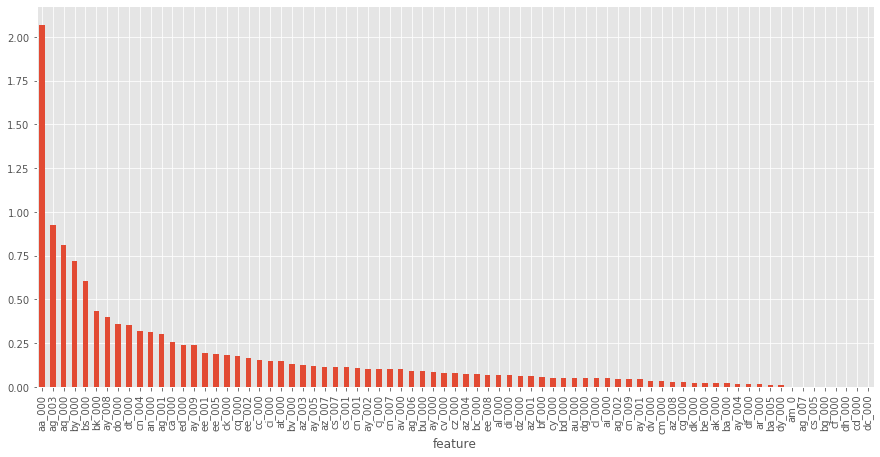

In [399]:
# Посмотрим на важность признаков:
featureImportance = pd.DataFrame({"feature": list(X_train.columns), 
                                  "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"][:77].plot('bar', figsize=(15, 7));


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


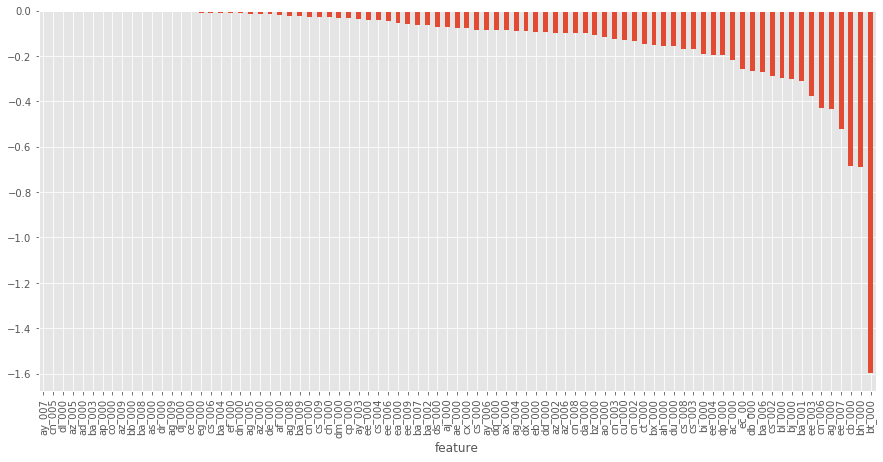

In [400]:
# Посмотрим на важность признаков:
featureImportance = pd.DataFrame({"feature": list(X_train.columns), 
                                  "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"][77:].plot('bar', figsize=(15, 7));


In [401]:
top_6x6 = featureImportance["importance"][:6] + featureImportance["importance"][-6:]
top_6x6 = list(top_6x6.index)
top_6x6.append('class')
len(top_6x6)


13

In [402]:
top_12x12 = featureImportance["importance"][:12] + featureImportance["importance"][-12:]
top_12x12 = list(top_12x12.index)
top_12x12.append('class')
len(top_12x12)


25

In [403]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)

df_train_mean = fill_NA(df_train[top_6x6], strategy = 'median')
df_test_mean = fill_NA(df_test[top_6x6], strategy = 'median')


In [404]:
df_list = assess_data(df_train_mean, df_test_mean)
df_quality.loc['top_6x6'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895


In [405]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)

df_train_mean = fill_NA(df_train[top_12x12], strategy = 'median')
df_test_mean = fill_NA(df_test[top_12x12], strategy = 'median')


In [406]:
df_list = assess_data(df_train_mean, df_test_mean)
df_quality.loc['top_12x12'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903


In [407]:
top_20x20 = featureImportance["importance"][:20] + featureImportance["importance"][-20:]
top_20x20 = list(top_20x20.index)
top_20x20.append('class')
len(top_20x20)


41

In [408]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)

df_train_mean = fill_NA(df_train[top_20x20], strategy = 'median')
df_test_mean = fill_NA(df_test[top_20x20], strategy = 'median')


In [409]:
df_list = assess_data(df_train_mean, df_test_mean)
df_quality.loc['top_20x20'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908


In [410]:
# Как видим, улучшения показателей отбором важных признаков мы не добились.


## 6. Поработаем с выбросами

In [411]:
df_train = data_train.drop(big_nulls_columns, axis = 1)
df_test = data_test.drop(big_nulls_columns, axis = 1)

df_train_mean = fill_NA(df_train, strategy = 'median')
df_test_mean = fill_NA(df_test, strategy = 'median')


In [412]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.05) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.95) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy


In [413]:
columns = list(df_train.columns)
columns.remove('class')

df_train_mean = windsorization(df_train_mean, cols = columns, 
                               borders_type = "iqr", strategy = 'both')


In [414]:
df_list = assess_data(df_train_mean, df_test_mean)
df_quality.loc['del_outlier'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908


### 7. Удалим категориальные признаки:

In [415]:
# Отберем категориальные признаки. Будем считать категориальными те признаки, которые имеют менее 100 уникальных значений:
obj_feature_7 = []
for i in columns_no_target:
    if data_train[i].nunique() < 100:
        obj_feature_7.append(i)

obj_feature_7


['ab_000',
 'ar_000',
 'as_000',
 'au_000',
 'cd_000',
 'ch_000',
 'cr_000',
 'cs_009',
 'dj_000',
 'dz_000',
 'ef_000',
 'eg_000']

In [416]:
col_for_del = big_nulls_columns + obj_feature_7


In [417]:
df_train = data_train.drop(col_for_del, axis = 1)
df_test = data_test.drop(col_for_del, axis = 1)


In [418]:
df_train_mean = fill_NA(df_train, strategy = 'median')
df_test_mean = fill_NA(df_test, strategy = 'median')


In [419]:
df_list = assess_data(df_train_mean, df_test_mean)
df_quality.loc['del_categ_columns'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908


## 8. Замена категориальных признаков, удаление "нулевых" и коррелирующих признаков.

In [420]:
del_columns = CorField + big_nulls_columns
len(del_columns)


74

In [421]:
data = pd.concat([data_train, data_test], keys=['train', 'test'])


In [422]:
df = data.drop(del_columns, axis = 1)
df = fill_NA(df, strategy = 'median')
df.shape


(76000, 102)

In [423]:
obj_feature_8 = []

columns_no_target = list(df.columns)
columns_no_target.remove('class')

for i in columns_no_target:
    if df[i].nunique() < 100:
        obj_feature_8.append(i)

len(obj_feature_8)


10

In [424]:
for i in obj_feature_8:
    data_categor = pd.get_dummies(df[i], drop_first = True, prefix = i)
    df_cat = pd.concat([df.drop(i, axis = 1), data_categor], axis = 1)
df_cat.shape


(76000, 155)

In [425]:
df_train = df_cat.loc['train']
df_test = df_cat.loc['test']
print(df_train.shape, df_test.shape)


(60000, 155) (16000, 155)


In [426]:
df_list = assess_data(df_train, df_test)
df_quality.loc['dummies'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908


### 9. Попробуем смесь действий:
1. Удалим коррелирующие, категориальные и с большим количеством пропущенных данных признаки
2. Заменим пустые значения на медиану по признаку
3. Выровним баланс данных.

In [427]:
del_columns = CorField + big_nulls_columns + obj_feature
len(del_columns)


86

In [428]:
df_train = data_train.drop(del_columns, axis = 1)
df_test = data_test.drop(del_columns, axis = 1)

df_train_median = fill_NA(df_train, strategy = 'median')
df_test_median = fill_NA(df_test, strategy = 'median')

print(data_train.shape, data_test.shape)
print(df_train_median.shape, df_test_median.shape)


(60000, 171) (16000, 171)
(60000, 92) (16000, 92)


In [429]:
l_n_train = int(len(df_train_median[df_train_median['class'] == 0]))
train_sam = pd.concat([ df_train_median[df_train_median['class'] == 0], 
                       df_train_median[df_train_median['class'] == 1].sample(l_n_train, replace = True) ])

train_sam['class'].value_counts()


1    59000
0    59000
Name: class, dtype: int64

In [430]:
l_n_test = int(len(df_test_median[df_test_median['class'] == 0]))
test_sam = pd.concat([ df_test_median[df_test_median['class'] == 0], 
                       df_test_median[df_test_median['class'] == 1].sample(l_n_test, replace = True) ])
test_sam['class'].value_counts()


1    15625
0    15625
Name: class, dtype: int64

In [431]:
data = pd.concat([train_sam, test_sam], keys=['train', 'test'])
data.shape


(149250, 92)

In [432]:
columns_no_target = list(data.columns)
columns_no_target.remove('class')
print(len(columns_no_target))


91


In [433]:
obj_feature_9 = []

for i in columns_no_target:
    if data[i].nunique() < 1000:
        obj_feature_9.append(i)
len(obj_feature_9)


16

In [434]:
for i in obj_feature_9:
    data_categor = pd.get_dummies(data[i], drop_first = True, prefix = i)
    df_cat = pd.concat([data.drop(i, axis = 1), data_categor], axis = 1)
df_cat.shape


(149250, 231)

In [435]:
df_train = df_cat.loc['train']
df_test = df_cat.loc['test']
print(df_train.shape, df_test.shape)


(118000, 231) (31250, 231)


In [436]:
df_list = assess_data(df_train, df_test)
df_quality.loc['all_way'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908


### 9.2. Добавим регуляризацию:


In [437]:
X_train = df_train.drop('class', axis = 1)
y_train = df_train['class']
X_test = df_test.drop('class', axis = 1)
y_test = df_test['class']
feature_columns = X_train.columns
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


In [438]:
model_LogR = LogisticRegression(solver="liblinear", penalty="l1")
model_LogR.fit(X_train_scaled, y_train);


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


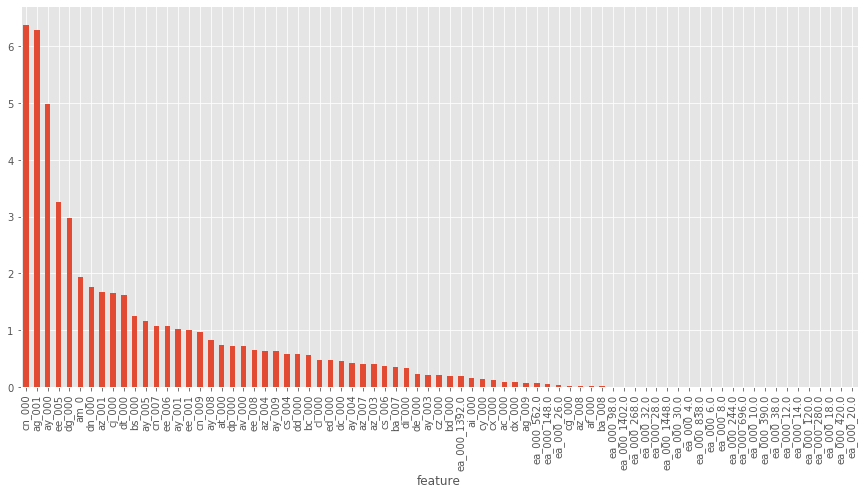

In [439]:
# Посмотрим на важность признаков:
featureImportance = pd.DataFrame({"feature": list(X_train.columns), 
                                  "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"][:77].plot('bar', figsize=(15, 7));


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


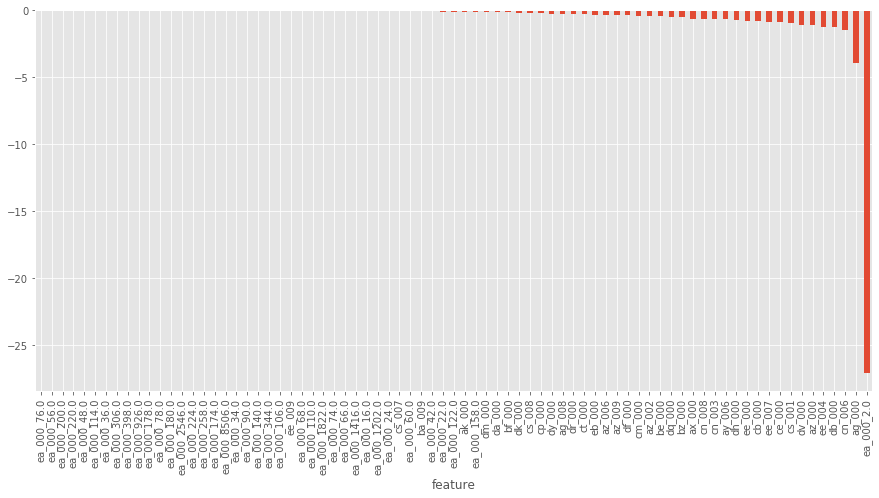

In [440]:
# Посмотрим на важность признаков:
featureImportance = pd.DataFrame({"feature": list(X_train.columns), 
                                  "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"][-77:].plot('bar', figsize=(15, 7));


In [441]:
top_10_5 = featureImportance["importance"][:10] + featureImportance["importance"][-5:]
top_10_5 = list(top_10_5.index)
top_10_5.append('class')
len(top_10_5)


16

In [442]:
df_list = assess_data(df_train[top_10_5], df_test[top_10_5])
df_quality.loc['all_way_top_10_5'] = df_list
df_quality.round(3)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.990,0.696,0.829,0.757,0.911
delet_all_nan,0.995,0.694,0.843,0.761,0.920
del_null_columns_and_mean_nan,0.990,0.704,0.838,0.765,0.916
del_null_columns_and_median_nan,0.990,0.707,0.841,0.768,0.917
del_null_columns_and_mode_nan,0.990,0.704,0.835,0.764,0.914
del_corr,0.987,0.589,0.825,0.687,0.907
sample,0.952,0.927,0.976,0.950,0.953
top_6x6,0.987,0.568,0.801,0.665,0.895
top_12x12,0.988,0.624,0.815,0.707,0.903
top_20x20,0.988,0.643,0.825,0.723,0.908
